## a data transformation process that aligns data values to a common scale or distribution of values so that. Normalization includes adjusting the scale of values to a similar metric or adjusting the time scales to be able to compare like periods.

# types of normalization
## it is done on each values in  columns
##  xi =  original value 
##  xi|=  value to be transforn 
##  x  = value of column
## 1  min max scaling         --> xi| = xi - xmin / xmax - xmin
## 2  mean normalizaation -->xi| = xi - xmean / xmax - xmin
##     sklearn has no class 
##       used in the case where centered data is required
## 3  Max absolute              --> xi|= xi  /  absx(max)
##       used in algorihm where zeros are more in data
## 4  Robost scaling           --> xi| = xi - xmedian /  IQR   (75% value - 25% value)
##      used in case where outlayers are more


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"bike_buyers_clean.csv")
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [3]:
data2= data.drop(['Marital Status','Gender','Education','Occupation','Home Owner','Commute Distance','Region','Purchased Bike'], axis=1)

In [4]:
data2

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36
...,...,...,...,...,...
995,23731,60000,2,2,54
996,28672,70000,4,0,35
997,11809,60000,2,0,38
998,19664,100000,3,3,38


<AxesSubplot:xlabel='Income', ylabel='Density'>

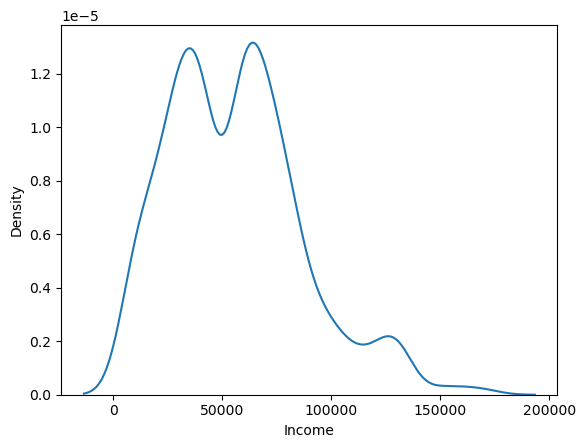

In [5]:
sns.kdeplot(data2["Income"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

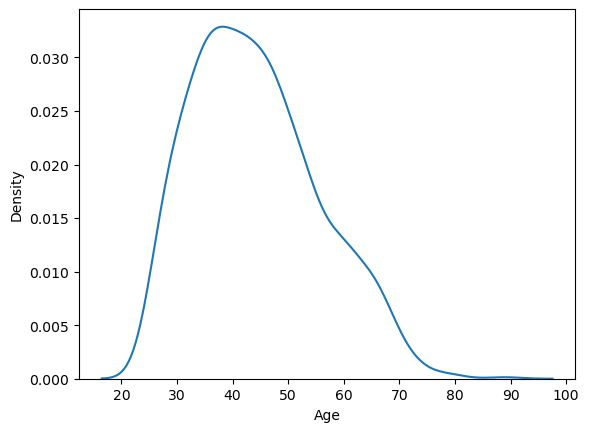

In [6]:
sns.kdeplot(data2["Age"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income'>

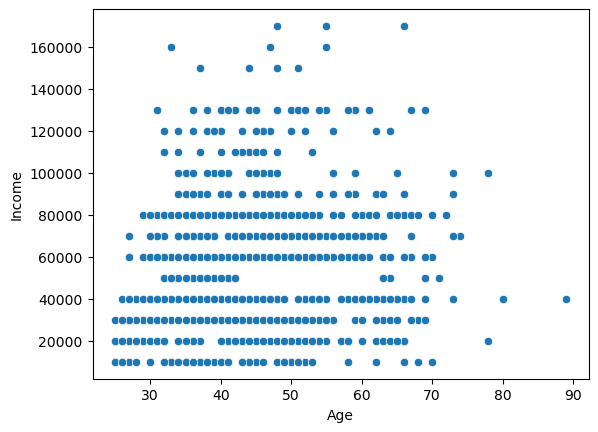

In [7]:
color_dict={1:'red', 2:'green',3:'green'}
sns.scatterplot(data2["Age"],data2["Income"], palette=color_dict)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data2.drop('ID', axis=1),
                                                  data2['ID'],
                                                  test_size=0.3,
                                                  random_state=0)
x_train.shape, x_test.shape

((700, 4), (300, 4))

# in this step min and max values are calculated

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to the train set , It will Learn the parameters
scaler.fit(x_train)

#trasnform train and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# sklearn library convert dataframe in np array to handle this 

In [10]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Income,Children,Cars,Age
count,700.0,700.0,700.0,700.0
mean,56157.1,1.9,1.5,44.3
std,31932.6,1.6,1.1,11.4
min,10000.0,0.0,0.0,25.0
25%,30000.0,0.0,1.0,36.0
50%,60000.0,2.0,1.0,43.0
75%,70000.0,3.0,2.0,52.0
max,170000.0,5.0,4.0,89.0


In [13]:
np.round(x_train_scaled.describe(),1)

,Income,Children,Cars,Age
count,700.0,700.0,700.0,700.0
mean,0.3,0.4,0.4,0.3
std,0.2,0.3,0.3,0.2
min,0.0,0.0,0.0,0.0
25%,0.1,0.0,0.2,0.2
50%,0.3,0.4,0.2,0.3
75%,0.4,0.6,0.5,0.4
max,1.0,1.0,1.0,1.0


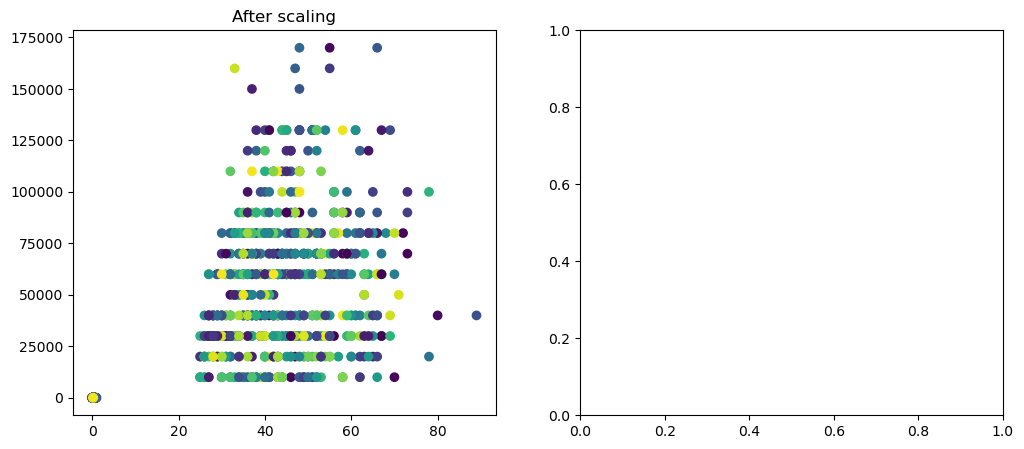

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['Income'],c=y_train)
ax1.set_title('Before scaling')
ax1.scatter(x_train_scaled['Age'], x_train_scaled['Income'],c=y_train)
ax1.set_title('After scaling')
plt.show()

<AxesSubplot:title={'center':'After scaling'}, xlabel='Age', ylabel='Density'>

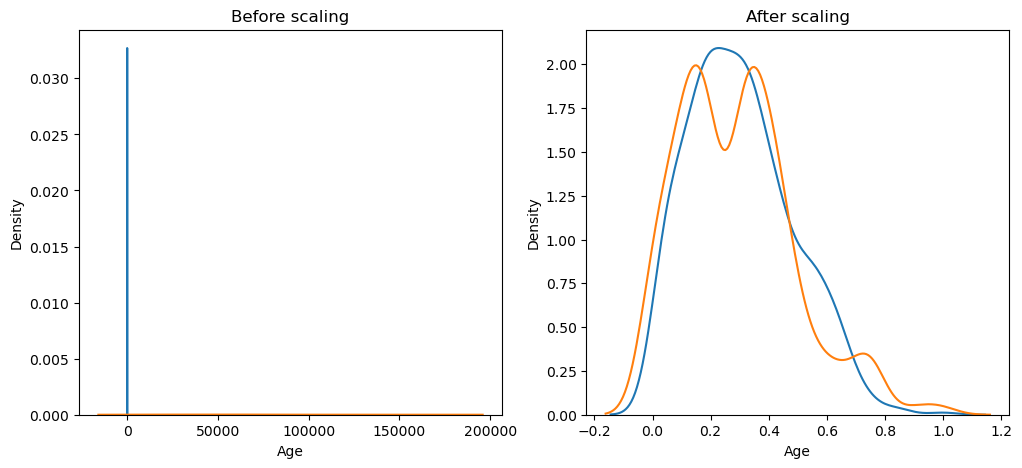

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['Income'], ax=ax1)

#before scaling
ax2.set_title('After scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['Income'], ax=ax2)